In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "data/raw_marketing_performance_data.csv"
df = pd.read_csv(path)

# drop Ref Value
df = df.drop(["Ref"], axis=1)

df.head()

,Channel,Marketing Type,Month,Conversions,Sessions,Revenue,Mkt_Spends
0,Affiliate,Paid,2019-01-01,2063,90265,97962,38324
1,CRM,Unpaid,2019-01-01,1973,81553,90510,1
2,Direct,Unpaid,2019-01-01,8576,271153,506082,94925
3,Display,Paid,2019-01-01,458,428076,19758,8101
4,SEA,Paid,2019-01-01,8669,167916,383978,186940


In [3]:
df.dtypes

Channel           object
Marketing Type    object
Month             object
Conversions        int64
Sessions           int64
Revenue            int64
Mkt_Spends         int64
dtype: object

In [4]:
# change type of "Month"
df["Month"] = pd.to_datetime(df["Month"])
df.dtypes

Channel                   object
Marketing Type            object
Month             datetime64[ns]
Conversions                int64
Sessions                   int64
Revenue                    int64
Mkt_Spends                 int64
dtype: object

In [5]:
# create monthly totals
monthly = df.groupby(by="Month").sum()

monthly

,Conversions,Sessions,Revenue,Mkt_Spends
Month,,,,
2019-01-01,35884,1610837,1684771,531161
2019-02-01,35342,1527560,1604022,473698
2019-03-01,45344,2455215,2424161,989950
2019-04-01,47809,2520046,2426537,1183005
2019-05-01,56851,2516463,2953018,1376814
2019-06-01,70043,3209219,3241407,1944779
2019-07-01,105692,5548080,4879431,2721935
2019-08-01,108573,5118885,5083279,2271652
2019-09-01,83725,3128462,3827509,1620819


In [6]:
# features calculation
# percentages multiply by 100
# limit to 2 decimals

monthly["CR"] = ((monthly["Conversions"]/monthly["Sessions"])*100).round(2)
monthly["CPL"] = (monthly["Mkt_Spends"]/monthly["Conversions"]).round(2)
monthly["RPC"] = (monthly["Revenue"]/monthly["Conversions"]).round(2)
monthly["ROAS"] = ((monthly["Revenue"]/monthly["Mkt_Spends"])*100).round(2)

monthly

,Conversions,Sessions,Revenue,Mkt_Spends,CR,CPL,RPC,ROAS
Month,,,,,,,,
2019-01-01,35884,1610837,1684771,531161,2.23,14.80,46.95,317.19
2019-02-01,35342,1527560,1604022,473698,2.31,13.40,45.39,338.62
2019-03-01,45344,2455215,2424161,989950,1.85,21.83,53.46,244.88
2019-04-01,47809,2520046,2426537,1183005,1.90,24.74,50.75,205.12
2019-05-01,56851,2516463,2953018,1376814,2.26,24.22,51.94,214.48
2019-06-01,70043,3209219,3241407,1944779,2.18,27.77,46.28,166.67
2019-07-01,105692,5548080,4879431,2721935,1.91,25.75,46.17,179.26
2019-08-01,108573,5118885,5083279,2271652,2.12,20.92,46.82,223.77
2019-09-01,83725,3128462,3827509,1620819,2.68,19.36,45.72,236.15


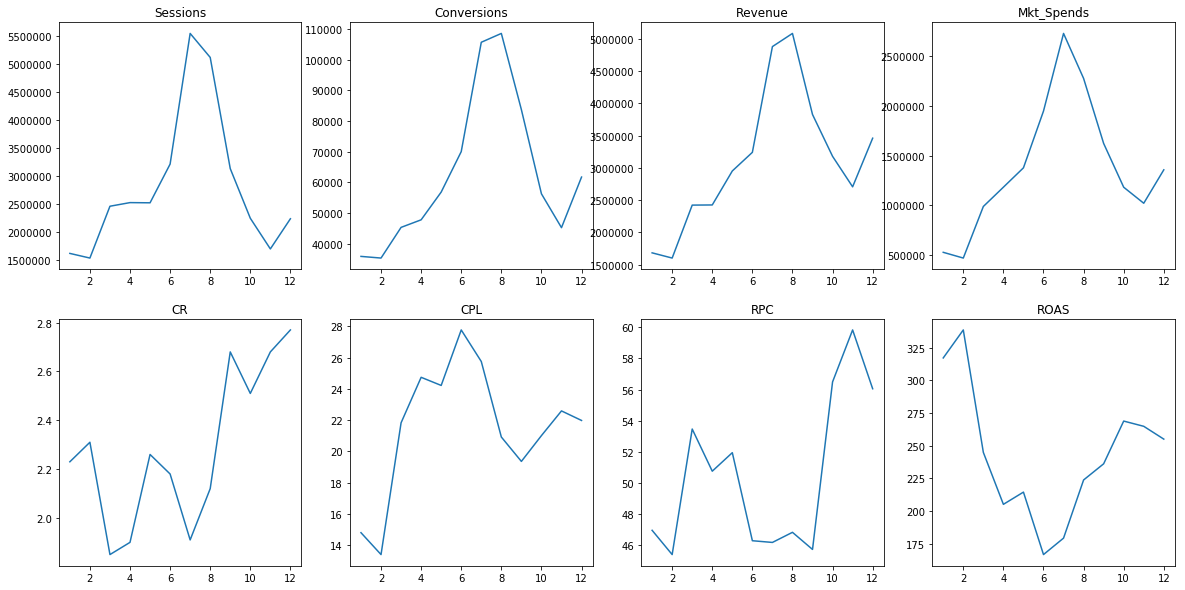

In [7]:
figure, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

axs[0,0].set_title("Sessions")
axs[0,0].plot(monthly.index.month, monthly["Sessions"]);
axs[0,1].set_title("Conversions")
axs[0,1].plot(monthly.index.month, monthly["Conversions"]);
axs[0,2].set_title("Revenue")
axs[0,2].plot(monthly.index.month, monthly["Revenue"]);
axs[0,3].set_title("Mkt_Spends")
axs[0,3].plot(monthly.index.month, monthly["Mkt_Spends"]);

axs[1,0].set_title("CR")
axs[1,0].plot(monthly.index.month, monthly["CR"]);
axs[1,1].set_title("CPL")
axs[1,1].plot(monthly.index.month, monthly["CPL"]);
axs[1,2].set_title("RPC")
axs[1,2].plot(monthly.index.month, monthly["RPC"]);
axs[1,3].set_title("ROAS")
axs[1,3].plot(monthly.index.month, monthly["ROAS"]);

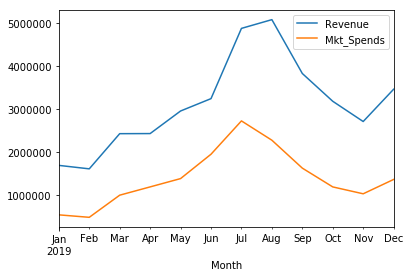

In [8]:
# Compare Revenue vs Mkt_Spends
df.groupby(by="Month").sum()[["Revenue","Mkt_Spends"]].plot.line();

Summer concentrates the most of traffic and leads, also the revenue and mkt_spends
However is the the less profitable period of time (lowest ROAS & RPC) and highest CPL

Check by Channel

In [9]:
# create dict marketing type for each channel
mkt_channel_type = {"Affiliate":"Paid",
                    "CRM":"Unpaid", 
                    "Direct":"Unpaid", 
                    "Display":"Paid", 
                    "Referral":"Unpaid",
                    "SEA":"Paid",
                    "SEO":"Unpaid",
                    "Social Media Paid":"Paid",
                    "Social Media Unpaid":"Unpaid"}

# create channel totals for 2019
channels = df.groupby(by="Channel").sum()
channels

,Conversions,Sessions,Revenue,Mkt_Spends
Channel,,,,
Affiliate,25674,1893713,1251145,732094
CRM,47916,858054,2450198,118562
Direct,129205,4073861,7877705,929484
Display,21832,12284357,919615,1171810
Referral,602,6892,37568,7648
SEA,272153,4706627,13318848,8167777
SEO,78280,4899117,3893935,328871
Social Media Paid,141158,3951831,6079369,4967340
Social Media Unpaid,35728,1122735,1643581,252082


In [10]:
# features calculation
# identical logic as monthly totals

channels["CR"] = ((channels["Conversions"]/channels["Sessions"])*100).round(2)
channels["CPL"] = (channels["Mkt_Spends"]/channels["Conversions"]).round(2)
channels["RPC"] = (channels["Revenue"]/channels["Conversions"]).round(2)
channels["ROAS"] = ((channels["Revenue"]/channels["Mkt_Spends"])*100).round(2)

channels

,Conversions,Sessions,Revenue,Mkt_Spends,CR,CPL,RPC,ROAS
Channel,,,,,,,,
Affiliate,25674,1893713,1251145,732094,1.36,28.51,48.73,170.90
CRM,47916,858054,2450198,118562,5.58,2.47,51.14,2066.60
Direct,129205,4073861,7877705,929484,3.17,7.19,60.97,847.54
Display,21832,12284357,919615,1171810,0.18,53.67,42.12,78.48
Referral,602,6892,37568,7648,8.73,12.70,62.41,491.21
SEA,272153,4706627,13318848,8167777,5.78,30.01,48.94,163.07
SEO,78280,4899117,3893935,328871,1.60,4.20,49.74,1184.03
Social Media Paid,141158,3951831,6079369,4967340,3.57,35.19,43.07,122.39
Social Media Unpaid,35728,1122735,1643581,252082,3.18,7.06,46.00,652.00


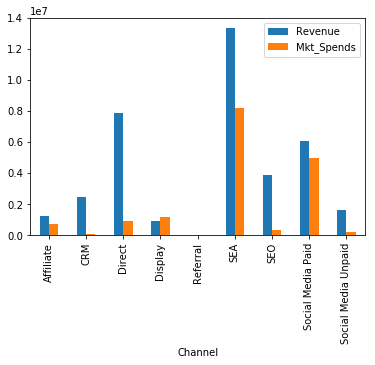

In [11]:
channels[["Revenue", "Mkt_Spends"]].plot.bar();


Unpaid channels are much profitable (compare investment in mkt with the revenue).
In Display there is even more spend than revenue

Due their different nature, it is necessary to analyse separately Paid and Unpaid